# Europe domain

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import numpy as np
from netCDF4 import Dataset
import sys
sys.path.append("..")
from gprof_article.plots import plot_colocation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
f = Dataset("../data/2019_10.nc")

../gprof_article/plots.py:84: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


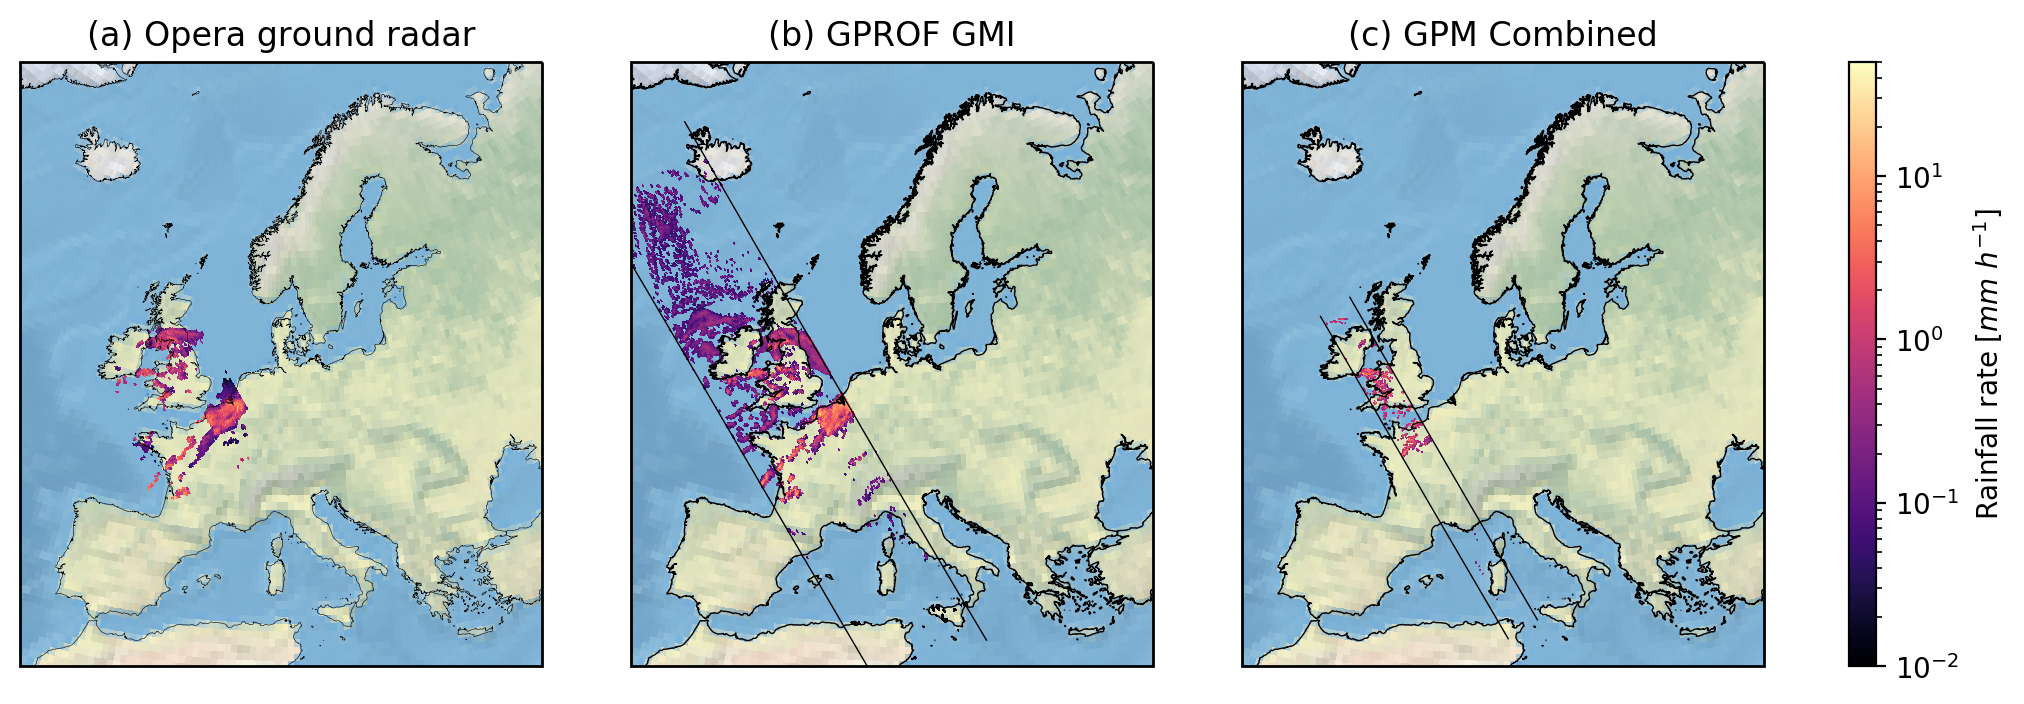

In [20]:
plot_colocation(f, 1)

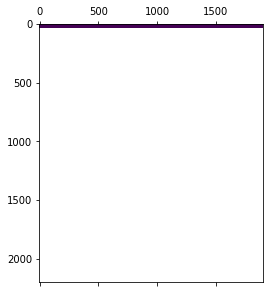

In [13]:
plt.matshow(f["mask"][ :, :])

In [4]:
f1 = next(files)

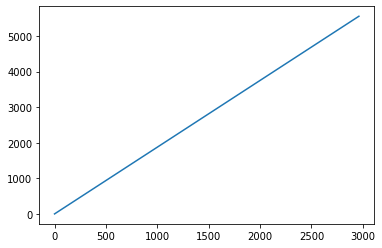

In [5]:
plt.plot(f1.time[:, 0])

In [6]:
(t - f1.start_time).seconds

36938

In [7]:
datetime(se)

NameError: name 'se' is not defined

In [8]:
lons = f1.lon_s2
lons = lons[lons > -1000]

lats = f1.lat_s2
lats = lats[lats > -1000]


AttributeError: 'GPM_2A_GPROF' object has no attribute 'lon_s2'

NameError: name 'lons' is not defined

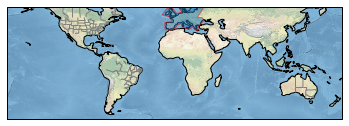

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cloud_colocations.shapes import opera

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -60, 60])

# put a background image on for nice sea rendering.
ax.stock_img()

# create a feature for states/admin 1 regions at 1:50m from natural earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

source = 'natural earth'
license = 'public domain'

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray')
ax.add_feature(cfeature.ShapelyFeature([opera],
                                       edgecolor = "red",
                                       crs = ccrs.PlateCarree()), alpha = 0.5)
ax.scatter(lons, lats)

# add a text annotation for the license information to the
# the bottom right corner.
plt.show()

In [5]:
from shapely.geometry import MultiPoint 
import numpy as np
coords = np.hstack([lons.reshape(-1, 1), lats.reshape(-1, 1)])
points = MultiPoint(coords)

ps = points.intersection(opera)

NameError: name 'lons' is not defined

In [6]:
coords = np.array(list(map(lambda x: getattr(x, "xy")[:], ps.geoms)))


NameError: name 'ps' is not defined

In [7]:
import glob
from h5py import File
f = glob.glob("../data/*GPM*")[0]
f = File(f)
list(f["S1"])

['ScanTime',
 'SCstatus',
 'Latitude',
 'Longitude',
 'pixelStatus',
 'qualityFlag',
 'L1CqualityFlag',
 'surfaceTypeIndex',
 'totalColumnWaterVaporIndex',
 'CAPE',
 'temp2mIndex',
 'sunGlintAngle',
 'probabilityOfPrecip',
 'spare2',
 'surfacePrecipitation',
 'frozenPrecipitation',
 'convectivePrecipitation',
 'rainWaterPath',
 'cloudWaterPath',
 'iceWaterPath',
 'mostLikelyPrecipitation',
 'precip1stTertial',
 'precip2ndTertial',
 'profileTemp2mIndex',
 'profileNumber',
 'profileScale']

## Opera data

In [1]:
from cloud_colocations.colocations.products import set_cache
from cloud_colocations.colocations.formats import OperaRainfall
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
set_cache("../data")
t = datetime(2020, 1, 14)
files = OperaRainfall.get_files_by_day(t)

In [2]:
import numpy as np
import cartopy.crs as ccrs
pc = ccrs.PlateCarree()

ll = np.array([-10.434, 31.746])
ul = np.array([-39.535, 67.023])
lr = np.array([29.421, 31.988])
ur = np.array([57.81, 67.62])

proj_opera = ccrs.LambertAzimuthalEqualArea(central_longitude=10,
                                            central_latitude=55,
                                           false_easting=1950000,
                                           false_northing=-2100000)
ll_t = proj_opera.transform_point(ll[0], ll[1], pc)
ul_t = proj_opera.transform_point(ul[0], ul[1], pc)
lr_t = proj_opera.transform_point(lr[0], lr[1], pc)
ur_t = proj_opera.transform_point(ur[0], ur[1], pc)

In [7]:
f.projection(np.ones(2), np.ones(2))

(array([829272.3606297, 829272.3606297]),
 array([-7811917.73597762, -7811917.73597762]))

In [3]:
f = next(files)

/home/simonpf/src/cloud_colocations/cloud_colocations/colocations/formats.py:1443: RuntimeWarning: invalid value encountered in greater
  return self.data > -9999000
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


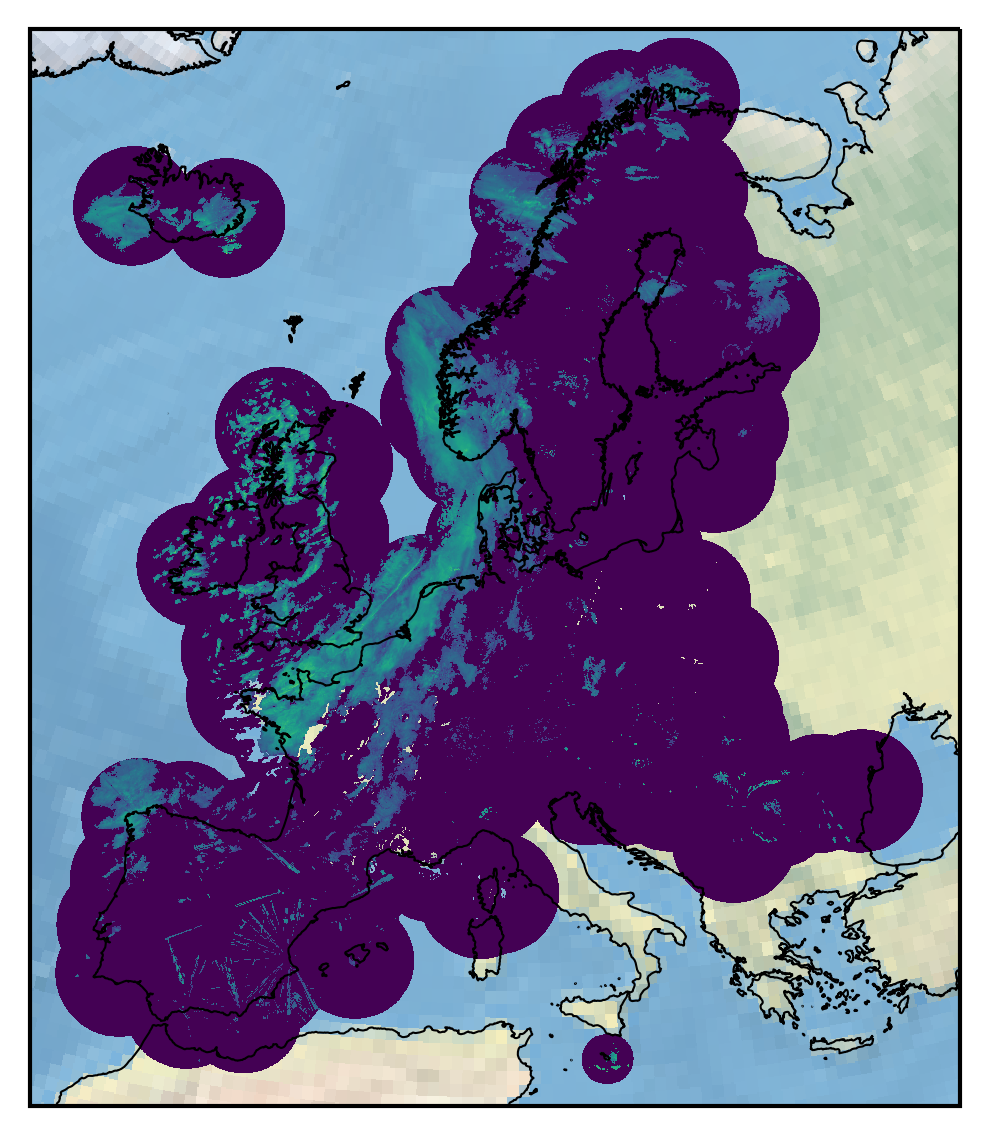

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LogNorm

for i,f in enumerate(files):
    f = next(files)
    i = i + 1
    plt.figure(figsize = (4, 8), dpi= 300)
    ax = plt.axes(projection=proj_opera)
    ax.set_extent([ll_t[0], ur_t[0], ll_t[1], ur_t[1]], crs = proj_opera)

    # put a background image on for nice sea rendering.
    ax.stock_img()

    # create a feature for states/admin 1 regions at 1:50m from natural earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')

    source = 'natural earth'
    license = 'public domain'

    xx = f.x
    yy = f.y

    ax.coastlines(resolution="10m", linewidth=0.5)

    data = np.maximum(np.copy(f.data), 1e-3)
    data[np.logical_not(f.mask)] = np.nan
    ax.pcolormesh(xx, yy, data, norm = LogNorm())
    # add a text annotation for the license information to the
    # the bottom right corner.
    plt.savefig("opera_{}.png".format(str(i).zfill(2)))
    break